# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | jacareacanga
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | yarmouth
Processing Record 7 of Set 1 | brooks
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | majene
Processing Record 11 of Set 1 | tefe
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | bacuit
City not found. Skipping...
Processing Record 15 of Set 1 | whitewater
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | mananjary
Processing Record 22 of Set 1 | nanortalik
Pro

Processing Record 36 of Set 4 | souillac
Processing Record 37 of Set 4 | dunedin
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | puerto leguizamo
Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | ponta do sol
Processing Record 42 of Set 4 | jalapa
Processing Record 43 of Set 4 | pilao arcado
City not found. Skipping...
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | havelock
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | eldorado
Processing Record 0 of Set 5 | port hardy
Processing Record 1 of Set 5 | hede
Processing Record 2 of Set 5 | dongsheng
Processing Record 3 of Set 5 | ati
Processing Record 4 of Set 5 | santa rosalia
Processing Record 5 of Set 5 | garowe
Processing Record 6 of Set 5 | kendari
Processing Record 7 of Set 5 | lucapa
Processing Record 8 of Set 5 | vanavara
Processing Rec

Processing Record 25 of Set 8 | caarapo
Processing Record 26 of Set 8 | kavaratti
Processing Record 27 of Set 8 | faya
Processing Record 28 of Set 8 | srikakulam
Processing Record 29 of Set 8 | kaitangata
Processing Record 30 of Set 8 | san juan
Processing Record 31 of Set 8 | teguldet
Processing Record 32 of Set 8 | tautira
Processing Record 33 of Set 8 | markova
Processing Record 34 of Set 8 | aron
Processing Record 35 of Set 8 | marsh harbour
Processing Record 36 of Set 8 | marcona
City not found. Skipping...
Processing Record 37 of Set 8 | mazagao
Processing Record 38 of Set 8 | kulhudhuffushi
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | skibbereen
Processing Record 41 of Set 8 | labuhan
Processing Record 42 of Set 8 | plouzane
Processing Record 43 of Set 8 | kieta
Processing Record 44 of Set 8 | guerrero
Processing Record 45 of Set 8 | korla
Processing Record 46 of Set 8 | turbiv
Processing Record 47 of Set 8 | saint-pierre
Processing Record 48 of Set 8

Processing Record 14 of Set 12 | buchanan
Processing Record 15 of Set 12 | kouango
Processing Record 16 of Set 12 | pacifica
Processing Record 17 of Set 12 | najran
Processing Record 18 of Set 12 | amboise
Processing Record 19 of Set 12 | paamiut
Processing Record 20 of Set 12 | saint-louis
Processing Record 21 of Set 12 | naldurg
Processing Record 22 of Set 12 | samarai
Processing Record 23 of Set 12 | iralaya
Processing Record 24 of Set 12 | vestmannaeyjar
Processing Record 25 of Set 12 | vestmanna
Processing Record 26 of Set 12 | provideniya
Processing Record 27 of Set 12 | melioratorov
Processing Record 28 of Set 12 | paka
Processing Record 29 of Set 12 | komsomolskiy
Processing Record 30 of Set 12 | margate
Processing Record 31 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 32 of Set 12 | bathsheba
Processing Record 33 of Set 12 | ngunguru
Processing Record 34 of Set 12 | gamba
Processing Record 35 of Set 12 | namtsy
Processing Record 36 of Set 12 | iskateley
P

In [4]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 84.8667, 'lat': 47.4667},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 10.9,
  'feels_like': 10.9,
  'temp_min': 10.9,
  'temp_max': 10.9,
  'pressure': 1018,
  'humidity': 89,
  'sea_level': 1018,
  'grnd_level': 939},
 'visibility': 8174,
 'wind': {'speed': 2.39, 'deg': 198, 'gust': 2.84},
 'clouds': {'all': 100},
 'dt': 1675887836,
 'sys': {'country': 'KZ', 'sunrise': 1675906599, 'sunset': 1675942374},
 'timezone': 21600,
 'id': 1517060,
 'name': 'Zaysan',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,57.06,81,75,4.61,AU,1675887011
1,albany,42.6001,-73.9662,46.67,51,10,1.99,US,1675886932
2,vaini,-21.2000,-175.2000,82.56,83,75,2.30,TO,1675887221
3,jacareacanga,-6.2222,-57.7528,82.62,87,24,3.24,BR,1675887636
4,salalah,17.0151,54.0924,73.49,73,0,2.30,OM,1675887379


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,57.06,81,75,4.61,AU,1675887011
1,albany,42.6001,-73.9662,46.67,51,10,1.99,US,1675886932
2,vaini,-21.2000,-175.2000,82.56,83,75,2.30,TO,1675887221
3,jacareacanga,-6.2222,-57.7528,82.62,87,24,3.24,BR,1675887636
4,salalah,17.0151,54.0924,73.49,73,0,2.30,OM,1675887379


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

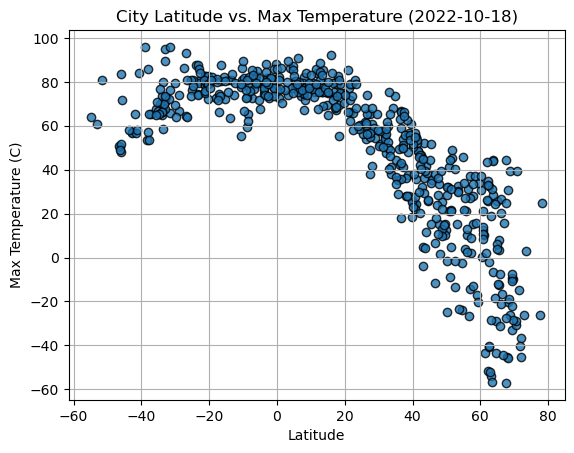

In [20]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values,y_values, edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-2-8)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

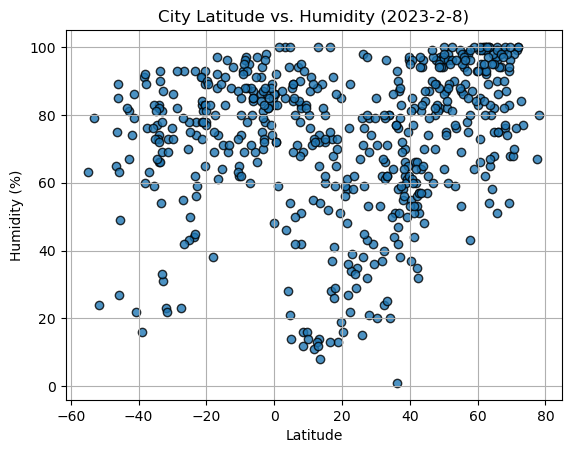

In [21]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values,y_values, edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-2-8)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

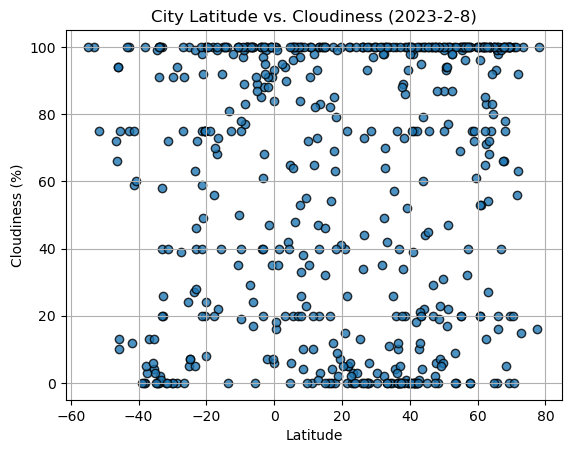

In [24]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values,y_values, edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-2-8)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

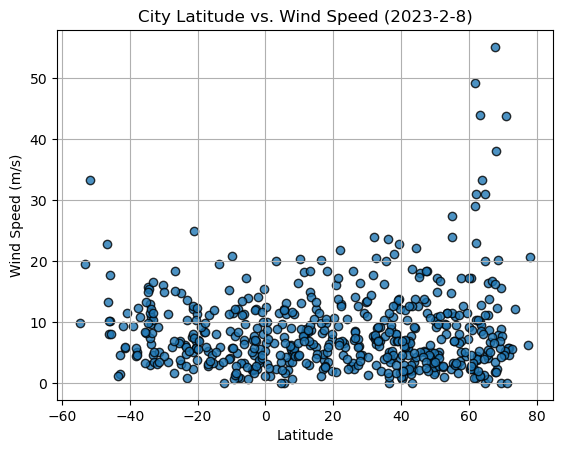

In [25]:
# Build the scatter plots for latitude vs. Wind Speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values,y_values, edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-2-8)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
#added it down below

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,46.67,51,10,1.99,US,1675886932
4,salalah,17.0151,54.0924,73.49,73,0,2.30,OM,1675887379
5,yarmouth,41.7057,-70.2286,48.67,60,0,10.36,US,1675887637
6,brooks,50.5834,-111.8851,31.98,75,93,14.97,CA,1675887602
12,aklavik,68.2191,-135.0107,-20.20,76,75,2.30,CA,1675887344


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,57.06,81,75,4.61,AU,1675887011
2,vaini,-21.2000,-175.2000,82.56,83,75,2.30,TO,1675887221
3,jacareacanga,-6.2222,-57.7528,82.62,87,24,3.24,BR,1675887636
7,arraial do cabo,-22.9661,-42.0278,80.56,78,40,10.36,BR,1675887285
8,rikitea,-23.1203,-134.9692,79.50,74,46,13.69,PF,1675887218


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7385825002829807


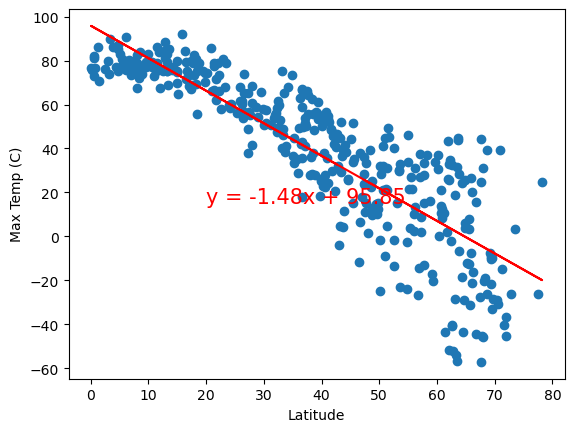

In [87]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.ylabel('Max Temp (C)')

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.22256872970145278


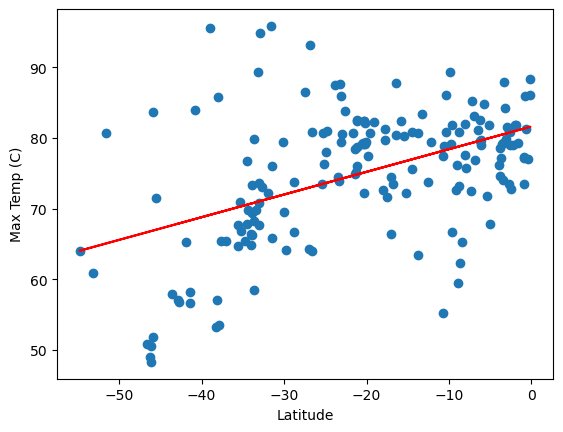

In [88]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.ylabel('Max Temp (C)')

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The linear relationship between the Northern and Southern Hemisphers have a positive relationship. The Max Temperatue gets higher when the Latitude is closer to 0. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16075480972482928


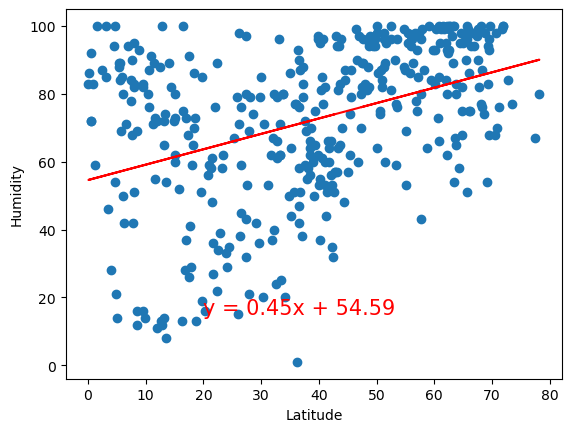

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.1278950718906757


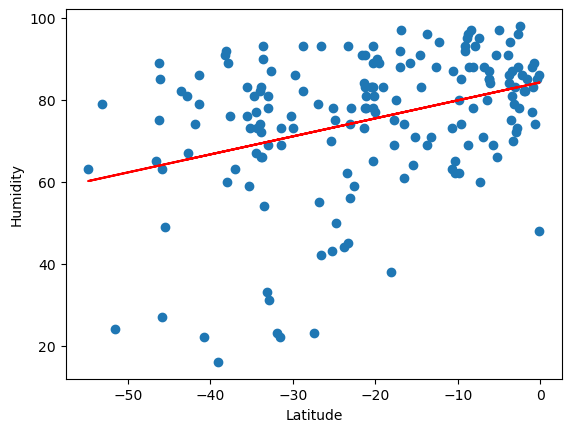

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The linear relationship between the Northern and Southern Hemisphers have a negative relationship. The further north that you are on the planet, the higher amount of humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.034996651701110215


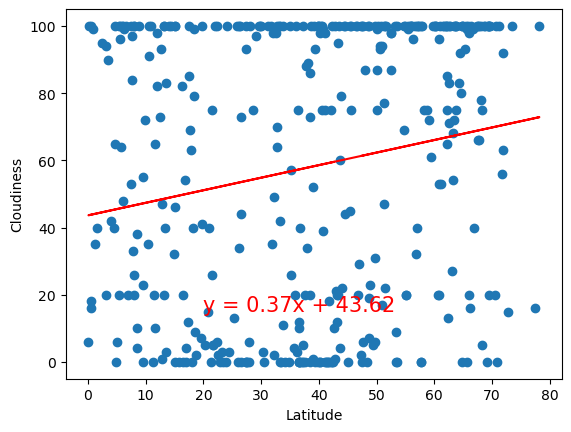

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.08223239993831295


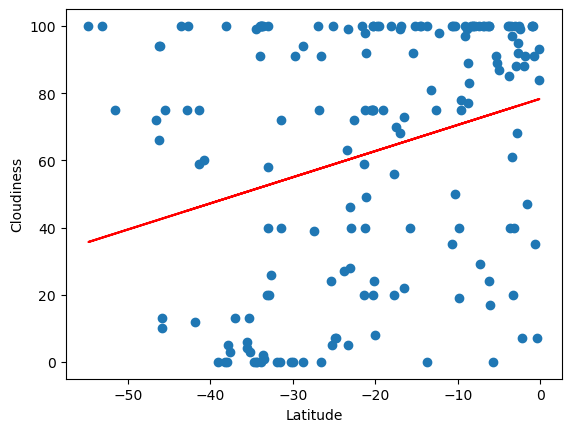

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The linear relationship between the Northern and Southern Hemisphers have a negative relationship. The further north that you are on the planet, the higher levels of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.014511401372974957


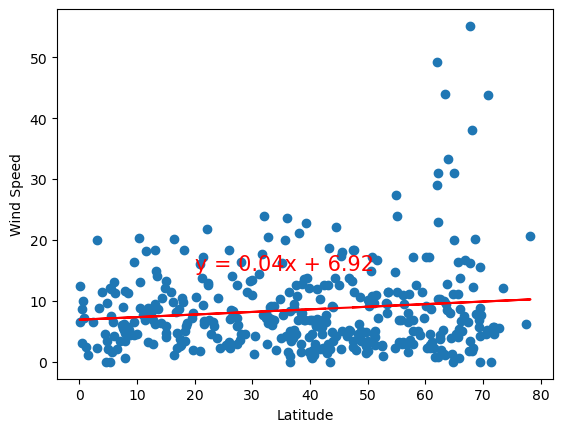

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.07222231847672927


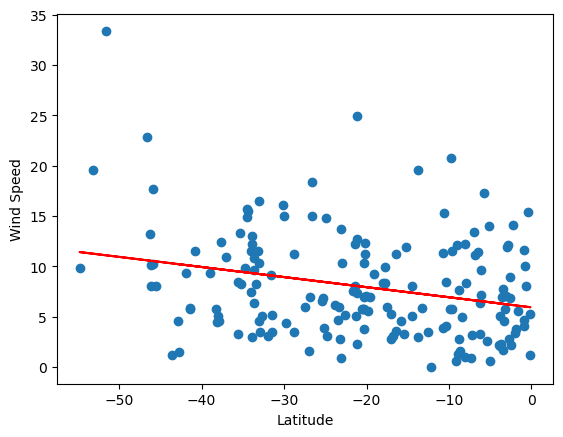

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.xlabel('Latitude')

plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The linear relationship between the Northern and Southern Hemisphers have a positive relationship. Wind Speeds get higher when the Latitude is closer to 0. 